In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
'''
customers who left within the last month - churn column
services each customer signed up for
customer account information
demographic info about customers

'''
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

--2020-05-28 12:10:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.30K  --.-KB/s    in 0.04s   

2020-05-28 12:10:41 (965 KB/s) - ‘ChurnData.csv’ saved [36144/36144]



In [3]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   longmon  ...  pager  internet  callwait  confer  ebill  loglong  logtoll  \
0     4.40  ...    1.0       0.0       1.0     1.0    0.0    1.482    3.033   
1     9.45  ...    0.0       0.0       0.0     0.0    0.0    2.246    3.240   
2     6.30  ...    0.0       0.0       0.0     1.0    0.0    1.841    3.240   
3     6.05  ...    1.0       1.0       1.0     1.0    1.0    1.800    3.807   
4     7.10  ...    0.0       0.0       1.0     1.0    0.0    1.960    3.091   

   lninc  custcat  churn  
0  4.913      4.0    1.0  
1  3.497      1.0    1.0  
2  3.401      3.0    0.0  
3  4.331      4.0    0.0  
4  4.382      3.0    0.0  

[5 rows x 28 columns]

In [4]:
# Data pre-processing and selection
    # note that we change target data to integer as required by skitlearn algorithm
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

    #define x &y
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(churn_df['churn'])

    # normalize
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [5]:
# Train/Test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [6]:
# Modeling Logistic Regression with Scikit-learn
'''
LogisticRegression: Scikit-learn package
    optimizers to find parameters:
        newton-cg
        lbfgs
        liblinear
        sag
        saga
Regularization: technique to solve the overfitting problem in models
    C parameter indicates inverse regularization strength which must be a positive float. smaller values stronger regularization
    
'''

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.00001, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# predict using test set
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [8]:
'''
predict_proba:
    input:
    returns: estimates for all classes, ordered by label of class. 
        first column P(y=1|X)
        second: P(y=0|x)
'''
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.50005777, 0.49994223],
       [0.50013788, 0.49986212],
       [0.500056  , 0.499944  ],
       [0.5002129 , 0.4997871 ],
       [0.50006348, 0.49993652],
       [0.50006799, 0.49993201],
       [0.49997157, 0.50002843],
       [0.50014559, 0.49985441],
       [0.49978692, 0.50021308],
       [0.50020585, 0.49979415],
       [0.5001414 , 0.4998586 ],
       [0.50025352, 0.49974648],
       [0.49987576, 0.50012424],
       [0.49981838, 0.50018162],
       [0.50031389, 0.49968611],
       [0.50010166, 0.49989834],
       [0.50001917, 0.49998083],
       [0.49990601, 0.50009399],
       [0.49993729, 0.50006271],
       [0.49997419, 0.50002581],
       [0.50017998, 0.49982002],
       [0.50003791, 0.49996209],
       [0.50020491, 0.49979509],
       [0.50004474, 0.49995526],
       [0.49997626, 0.50002374],
       [0.50040933, 0.49959067],
       [0.50011522, 0.49988478],
       [0.50001354, 0.49998646],
       [0.49996394, 0.50003606],
       [0.50041755, 0.49958245],
       [0.

In [9]:
# Evaluation using jaccard index - define jaccard as size of intersection divided by the size of the union of two label sets
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/Users/korashassani/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.725

In [10]:
# Evaluation using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 9  6]
 [ 5 20]]


Confusion matrix, without normalization
[[ 9  6]
 [ 5 20]]


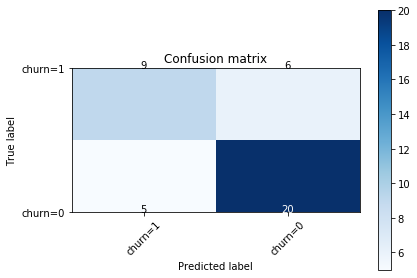

In [11]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [12]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78        25
           1       0.64      0.60      0.62        15

    accuracy                           0.73        40
   macro avg       0.71      0.70      0.70        40
weighted avg       0.72      0.72      0.72        40



In [13]:
# log loss: measures performance of a classifier where the predicted output is probability value between 0 and 1
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6929256905019558